<a href="https://colab.research.google.com/github/hanyuc37/stc510/blob/main/Module_3_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
data = pd.read_csv('crimestat (1).csv', error_bad_lines=False, engine ='python')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 131678: unexpected end of data


In [149]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131676 entries, 0 to 131675
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC NUMBER          131676 non-null  object 
 1   OCCURRED ON         131360 non-null  object 
 2   OCCURRED TO         93174 non-null   object 
 3   UCR CRIME CATEGORY  131676 non-null  object 
 4   100 BLOCK ADDR      131676 non-null  object 
 5   ZIP                 131673 non-null  float64
 6   PREMISE TYPE        130919 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [150]:
data.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201600000052855,11/01/2015 00:00,01/09/2016 00:00,MOTOR VEHICLE THEFT,N 43RD AVE & W CACTUS RD,85029.0,SINGLE FAMILY HOUSE
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
4,201500002102668,11/01/2015 00:00,11/01/2015 11:50,MOTOR VEHICLE THEFT,69XX W WOOD ST,85043.0,SINGLE FAMILY HOUSE


In [151]:
data.rename(columns = {'100 BLOCK ADDR': 'ADDR'},inplace = True)

1. Grouping crimes by zip code.

In [152]:
data.isna().sum()

INC NUMBER                0
OCCURRED ON             316
OCCURRED TO           38502
UCR CRIME CATEGORY        0
ADDR                      0
ZIP                       3
PREMISE TYPE            757
dtype: int64

In [153]:
data = data.loc[~data['ZIP'].isna()]
data.ZIP = data.ZIP.astype(int)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [154]:
sub_zip = pd.DataFrame(data.groupby('ZIP')['ZIP'].count().sort_values(ascending = False))

In [155]:
sub_zip.rename (columns = {'ZIP': 'count'},inplace = True)
sub_zip.reset_index(inplace = True)

In [156]:
sub_zip[:10]

,ZIP,count
0,85015,6963
1,85008,6320
2,85009,5513
3,85041,5477
4,85051,5389
5,85017,5355
6,85035,4752
7,85043,4331
8,85032,4301
9,85033,4258


Zipcode of  "85014"  is where crimes occur the most.

In [174]:
sub_zip[:10]

,ZIP,count
0,85015,6963
1,85008,6320
2,85009,5513
3,85041,5477
4,85051,5389
5,85017,5355
6,85035,4752
7,85043,4331
8,85032,4301
9,85033,4258


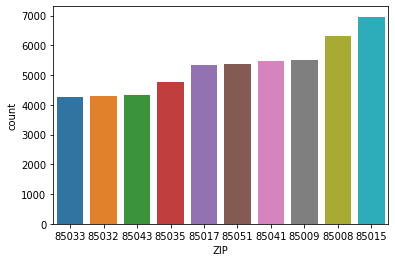

In [180]:
sns.barplot(x = 'ZIP', y ='count', data = sub_zip[:10],order= sub_zip[:10].sort_values('count').ZIP)

Single family house, apartment and parking lot are the three places has most crimes

In [158]:
data.groupby('PREMISE TYPE')['PREMISE TYPE'].count().sort_values(ascending = False)

PREMISE TYPE
SINGLE FAMILY HOUSE                    25329
APARTMENT                              14956
PARKING LOT                            14148
STREET / ROADWAY / ALLEY / SIDEWALK    11596
RETAIL BUSINESS                        10852
                                       ...  
FARM FACILITY                              3
GAMBLING FACILITY/CASINO/RACE TRACK        2
LAKE / WATERWAY / BEACH                    1
TRIBAL LANDS                               1
REST AREA                                  1
Name: PREMISE TYPE, Length: 93, dtype: int64

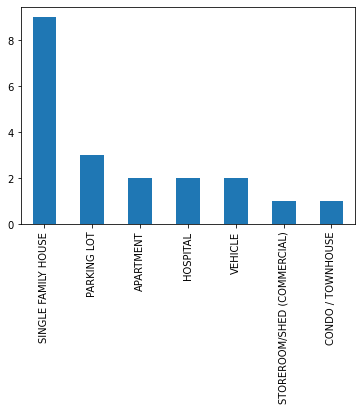

In [165]:
data['PREMISE TYPE'][:20].value_counts().plot.bar()

The most common crime type: Larceny theft,burglary, motor vehicle theft are the three most common crime type in Pheonix.

In [159]:
data.groupby('UCR CRIME CATEGORY')['UCR CRIME CATEGORY'].count().sort_values(ascending = False)

UCR CRIME CATEGORY
LARCENY-THEFT                            66214
BURGLARY                                 23647
MOTOR VEHICLE THEFT                      14391
DRUG OFFENSE                              9572
AGGRAVATED ASSAULT                        9306
ROBBERY                                   5640
RAPE                                      1980
ARSON                                      634
MURDER AND NON-NEGLIGENT MANSLAUGHTER      289
Name: UCR CRIME CATEGORY, dtype: int64